In [1]:
import pandas as pd
import string
from collections import Counter as cnt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stopwords=['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",
           'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers',
           'herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which',
           'who','whom','this','that',"that'll",'these','how','these','those','am','is','are','was','were',
           'be','been','being','have','has','had','having','do','does','did','done','doing','a','an','the',
           'and','but','if','or','because','as','until','while','of','at','by','for','with','about','against',
           'between','into','through','during','before','after','above','below','to','from','up','down','in','out',
           'on','off','over','under','again','further','then','once','here','there','when','where','why','how',
           'all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same',
           'so','than','too','very','s','t','can','will','just','don',"don't",'should',"should've",'now','d','ll','m',
           'o','re','ve','y','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',
           "hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',
           "needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',
           "wouldn't","gregor","samsa", 'looked', "What's",'although','upright','bit','right','state',"i've",'much','more',
           "there's","You've",'got',"i'd",'everything','true','yes','moreover','would','could','like','mr.','but',
           "i'm",'able','back','get','still','ought','knows','gregor!','gregor?','perhaps','without','away','onto','ive',
          'must','see','went','saw','many','whats','id','let','day','never','yet','im','go','thatll','theyre','came','youll',
          'come','word','noone',"mr.","mrs.","now!","then?",'mr']

In [3]:
p=string.punctuation
print('\nPUNCTUATIONS:\n',p)


PUNCTUATIONS:
 !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
#opening the document and converting in lower case letters
file = open(r"C:\Users\mishr\METHAMORPHOSIS-i_iii.txt").read()
metamorphosis = file.lower()

In [5]:
#removing punctuatuin
meta= metamorphosis.translate(str.maketrans('', '', string.punctuation))

In [6]:
#word tokenization
tokenized_meta = word_tokenize(meta, "english")

In [7]:
#removing the stop words
meta_stop=[]
for i in tokenized_meta:
    if i not in stopwords:
        meta_stop.append(i)

In [8]:
print("No of Tokenized word found-",len(tokenized_meta),
     "\nNo of Words after removing stopwords-",len(meta_stop),
     "\nNo of words dropped-", len(tokenized_meta)-len(meta_stop))

No of Tokenized word found- 22006 
No of Words after removing stopwords- 8688 
No of words dropped- 13318


In [9]:
#using lemmatizer to get the root words
meta_lematized = []

for i in meta_stop:
    i = WordNetLemmatizer().lemmatize(i)
    meta_lematized.append(i)

In [10]:
emotion = []
with open(r"C:\Users\mishr\metamophosis_sentiment.txt", 'r') as file:
    for i in file:
        x= i.replace('\n', '').replace(',', '').replace("'", '').strip()
        words, emotions = x.split(':')
        
        if words in meta_lematized:
            emotion.append(emotions)

In [11]:
counter=cnt(emotion)
counter

Counter({' caring': 17,
         ' agony': 24,
         ' desire': 12,
         ' happy': 26,
         ' hunger': 7,
         ' kind': 11,
         ' sad': 53,
         ' irritated': 16,
         ' awed': 9})

In [12]:
df_meta = pd.DataFrame.from_dict(counter, orient='index').reset_index().rename(columns={'index':'sentiment', 0:'count'})
df_meta

,sentiment,count
0,caring,17
1,agony,24
2,desire,12
3,happy,26
4,hunger,7
5,kind,11
6,sad,53
7,irritated,16
8,awed,9


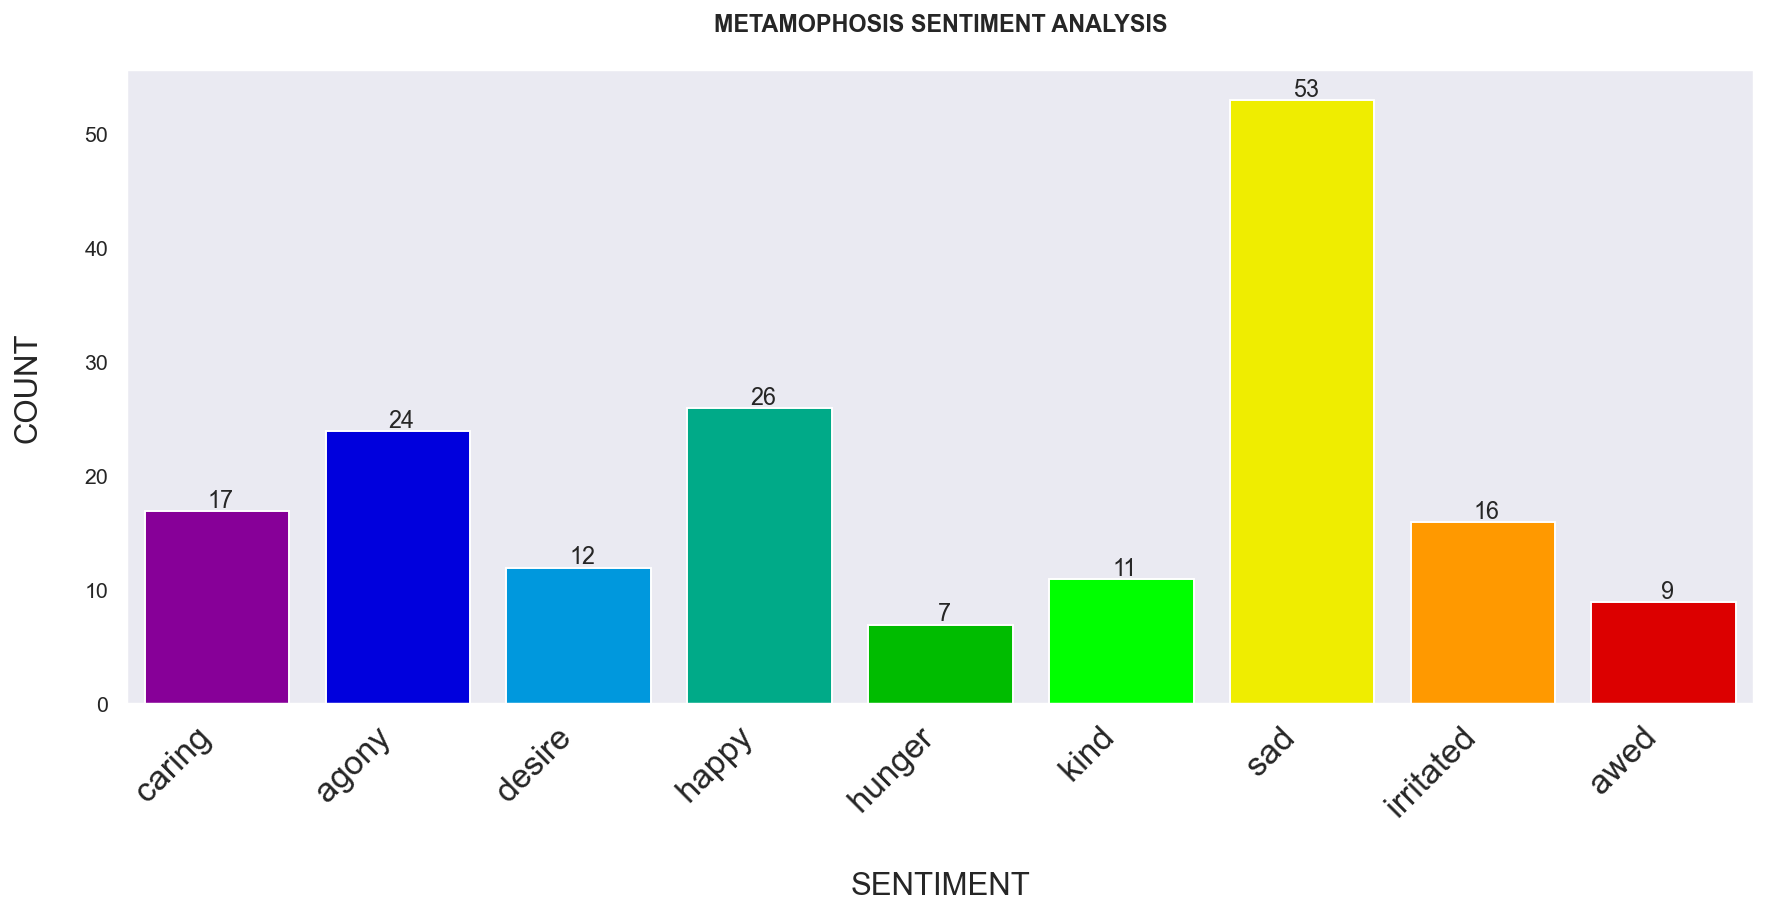

In [13]:
plt.figure(figsize=(15,6),dpi=140)
sns.set_context('talk',font_scale=2)
sns.set(style='dark')
m=sns.barplot(x='sentiment', y='count',data=df_meta,palette='nipy_spectral', saturation=75)
m.set_xticklabels(m.get_xticklabels(),rotation=45,horizontalalignment='right',fontweight='light',fontsize='x-large')
for i in m.patches:
    m.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(2,5),ha='center',va='center',textcoords='offset points')
plt.xlabel('\nSENTIMENT',fontsize=16)
plt.ylabel('COUNT\n',fontsize=16)
plt.title('METAMOPHOSIS SENTIMENT ANALYSIS\n',weight='bold')
plt.show()